In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt      
import seaborn as sns
from collections import Counter
from sklearn.decomposition import PCA
from matplotlib import rcParams
%matplotlib inline
from statistics import mean

In [2]:
df = pd.read_csv('df_median.csv')
#Dropping the unnamed col again!
df.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
#We added the new column of substracy of 'Last_Q' and 'Prev_Q'
df['Last_Q_Net - Prev_Q_Net'] = df['Last_Q_Net'] - df['Prev_Q_Net']
df

,Avg_50,Avg_200,Week_52_High,Week_52_Low,Vol_Avg_10_Day,Vol_Avg_3_Months,Held_By_Institusion(%),Perf_Week(%),Perf_Month(%),Perf_Quarter(%),Perf_Half_Year(%),Perf_Year(%),Analyst_Mean_Target_Price,Current_Stock_Price,Last_Q_Net,Prev_Q_Net,Sector,Symbols,Last_Q_Net - Prev_Q_Net
0,67.2800,53.0700,80.93,25.850,73040.0,87260.0,0.4269,-0.0025,-0.1778,0.0117,0.3084,1.4259,91.00,59.31,26.02,51.01,Financial Services,AMRK,-24.99
1,76.4200,68.7600,83.79,59.220,232580.0,172720.0,0.7182,0.0231,0.0279,0.2026,0.2735,0.1947,71.00,79.69,15.58,20.61,Industrials,AAON,-5.03
2,9.7800,9.8100,10.69,9.610,14850.0,50430.0,0.8706,-0.0111,0.0020,0.0103,-0.0111,0.0353,27.67,9.83,-0.22,-0.21,Financial Services,ABGI,-0.01
3,9.8300,9.8100,10.33,9.570,13730.0,22730.0,0.6265,0.0020,-0.0164,-0.0589,-0.1115,0.0353,27.67,12.23,0.02,-0.23,Financial Services,ASPA,0.25
4,3.3206,3.9017,11.69,1.950,222750.0,2370000.0,0.0037,-0.0867,0.1118,0.4612,-0.2911,-0.3207,9.50,3.44,-1.81,-1.97,Healthcare,ABVC,0.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3815,67.7200,57.6300,79.17,37.860,3800000.0,4270000.0,0.7592,-0.0014,-0.0769,0.0527,0.2362,0.4130,85.44,65.52,-40.60,9.30,Technology,ZI,-49.90
3816,0.5949,0.7805,3.06,0.481,1080000.0,2270000.0,0.1440,-0.1278,-0.1822,-0.3219,-0.4922,-0.1351,2.00,0.50,-8.67,-6.14,Healthcare,ZSAN,-2.53
3817,324.7900,248.1400,376.11,157.030,2440000.0,2150000.0,0.4190,0.0118,-0.0920,0.2484,0.4958,0.6335,390.61,325.61,-90.80,-81.02,Technology,ZS,-9.78
3818,3.6158,4.3503,9.00,2.875,611920.0,1290000.0,0.3224,-0.1155,-0.1733,-0.3071,-0.4499,-0.1101,7.19,3.04,-10.58,-9.95,Healthcare,ZYNE,-0.63


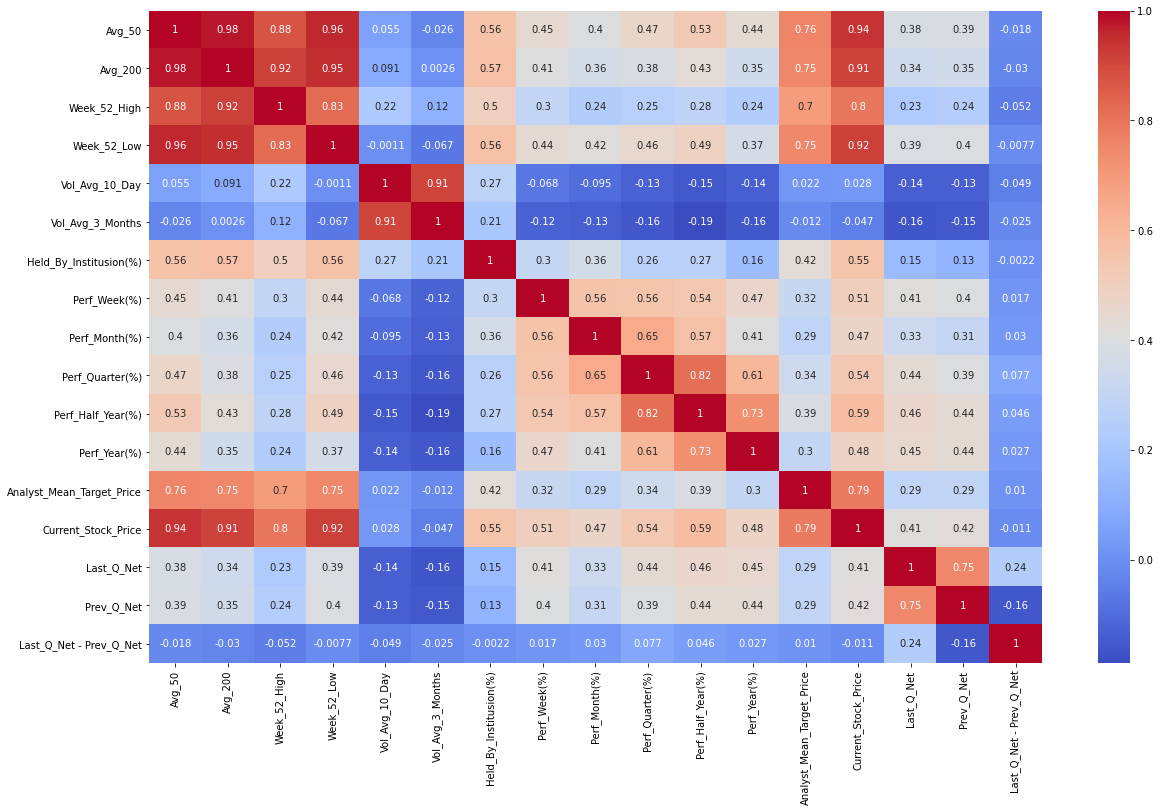

In [4]:
#Checking the corelations in our data!
f, ax = plt.subplots(figsize=(20, 12))
corrMatrix = df.corr('spearman')
sns.heatmap(corrMatrix, annot=True, cmap='coolwarm')
plt.show()

In [5]:
Sectors = df['Sector'] #Saved the sectors in a list
df.drop('Sector', axis = 1, inplace = True) #dropping the sector from dataframe
Symbol = df['Symbols'] #Saving the symbols in a list
df.drop('Symbols', axis = 1, inplace = True) # Dropping the symbols col in order to make the code work with floats

In [6]:
#Appending the corelation array with the best corelations that are above 0.5
correlations=[]
arr=[]
cols1=df.columns
cols2=df.columns
i=0
for col1 in cols1:
    j=0
    for col2 in cols2:
        if col1==col2:
            break
        if df[col1].corr(df[col2])>=0.5 or df[col1].corr(df[col2])<=-0.5:
            arr.append(f"({df.columns[i]}, {df.columns[j]})")
        j+=1
    i+=1
print(arr)
#We removed the sectors from dataframe in order to make the code above work with floats!!
df['Sector'] = Sectors 
df['Symbol'] = Symbol

['(Avg_200, Avg_50)', '(Week_52_High, Avg_50)', '(Week_52_High, Avg_200)', '(Week_52_Low, Avg_50)', '(Week_52_Low, Avg_200)', '(Week_52_Low, Week_52_High)', '(Vol_Avg_3_Months, Vol_Avg_10_Day)', '(Perf_Month(%), Perf_Week(%))', '(Perf_Quarter(%), Perf_Month(%))', '(Perf_Half_Year(%), Perf_Quarter(%))', '(Perf_Year(%), Perf_Half_Year(%))', '(Analyst_Mean_Target_Price, Avg_50)', '(Analyst_Mean_Target_Price, Avg_200)', '(Analyst_Mean_Target_Price, Week_52_High)', '(Analyst_Mean_Target_Price, Week_52_Low)', '(Current_Stock_Price, Avg_50)', '(Current_Stock_Price, Avg_200)', '(Current_Stock_Price, Week_52_High)', '(Current_Stock_Price, Week_52_Low)', '(Current_Stock_Price, Analyst_Mean_Target_Price)', '(Prev_Q_Net, Last_Q_Net)']


In [7]:
#The highest corelations
df.corr()

,Avg_50,Avg_200,Week_52_High,Week_52_Low,Vol_Avg_10_Day,Vol_Avg_3_Months,Held_By_Institusion(%),Perf_Week(%),Perf_Month(%),Perf_Quarter(%),Perf_Half_Year(%),Perf_Year(%),Analyst_Mean_Target_Price,Current_Stock_Price,Last_Q_Net,Prev_Q_Net,Last_Q_Net - Prev_Q_Net
Avg_50,1.000000,0.995454,0.964430,0.981848,0.045412,0.031674,0.204825,0.092098,0.068727,0.125447,0.163413,0.092739,0.976444,0.995505,0.450340,0.485221,-0.060661
Avg_200,0.995454,1.000000,0.967309,0.990028,0.041114,0.027491,0.209537,0.084644,0.066788,0.103706,0.134022,0.071499,0.979216,0.989689,0.435660,0.473221,-0.067712
Week_52_High,0.964430,0.967309,1.000000,0.949518,0.056798,0.040842,0.204681,0.071215,0.049340,0.094313,0.127058,0.073953,0.947797,0.957238,0.408894,0.441381,-0.057010
Week_52_Low,0.981848,0.990028,0.949518,1.000000,0.033472,0.022112,0.204643,0.091321,0.078158,0.111521,0.135234,0.056405,0.964279,0.976820,0.400280,0.444577,-0.085358
Vol_Avg_10_Day,0.045412,0.041114,0.056798,0.033472,1.000000,0.806759,0.012188,-0.012912,0.029747,0.003232,-0.032664,-0.004024,0.039676,0.045409,0.322659,0.325806,0.008200
Vol_Avg_3_Months,0.031674,0.027491,0.040842,0.022112,0.806759,1.000000,-0.023596,-0.075814,-0.062139,0.022147,-0.037280,-0.005766,0.027288,0.032037,0.244653,0.246182,0.008243
Held_By_Institusion(%),0.204825,0.209537,0.204681,0.204643,0.012188,-0.023596,1.000000,0.210096,0.249735,0.179339,0.202685,0.064308,0.190250,0.206884,0.045629,0.046407,0.000372
Perf_Week(%),0.092098,0.084644,0.071215,0.091321,-0.012912,-0.075814,0.210096,1.000000,0.571456,0.437734,0.403414,0.246657,0.078094,0.103045,0.043832,0.039253,0.012954
Perf_Month(%),0.068727,0.066788,0.049340,0.078158,0.029747,-0.062139,0.249735,0.571456,1.000000,0.591080,0.480187,0.216100,0.059784,0.085128,0.035482,0.032768,0.008139
Perf_Quarter(%),0.125447,0.103706,0.094313,0.111521,0.003232,0.022147,0.179339,0.437734,0.591080,1.000000,0.772723,0.392739,0.100545,0.141057,0.061843,0.051674,0.027048


Text(0, 0.5, '')

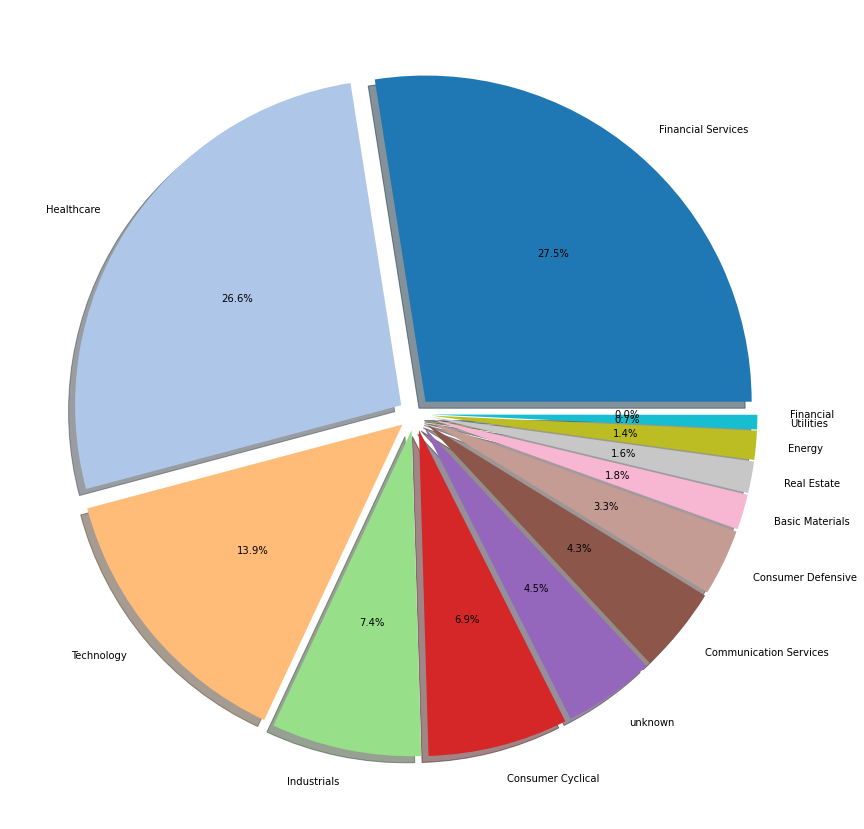

In [8]:
#Visualizing the sectors (how much tech stocks, how much health stocks and etc...)
fig, axes = plt.subplots(1,1, figsize=(25,15))
sr = df['Sector'].value_counts()
explode=(0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05)
sr.plot(kind='pie',cmap='tab20',autopct='%1.1f%%',explode=explode,shadow=True)
plt.ylabel('')

Text(0, 0.5, 'Avg_50')

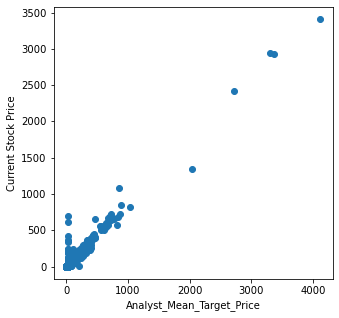

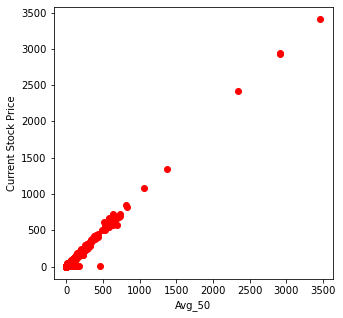

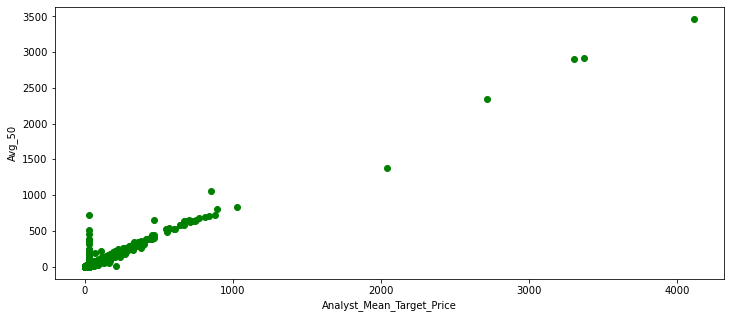

In [9]:
#We wanted to see the corelation between Analyst_Mean_Target_Price and Current_Stock_Price
#Conclusion: We know that as long as the analyst mean target price is high people will want to buy more of the stock what makes his price higher than ever
fig, axes = plt.subplots(1,1, figsize=(5,5))
axes.scatter(df['Analyst_Mean_Target_Price'],df['Current_Stock_Price'])
plt.xlabel('Analyst_Mean_Target_Price')
plt.ylabel('Current Stock Price')

#We wanted to see the corelation between avg_50 and Current_Stock_Price
#Conclusion: As the avg is higher the stock is strong and remaining high as long as the avg is high!
fig, axes = plt.subplots(1,1, figsize=(5,5))
axes.scatter(df['Avg_50'],df['Current_Stock_Price'], color = 'red')
plt.xlabel('Avg_50')
plt.ylabel('Current Stock Price')

#Conclusion: The analyst mean target price is high, the average of the stock remaining high!
fig, axes = plt.subplots(1,1, figsize=(12,5))
axes.scatter(df['Analyst_Mean_Target_Price'],df['Avg_50'], color = 'green')
plt.xlabel('Analyst_Mean_Target_Price')
plt.ylabel('Avg_50')

In [10]:
#Avg of every sector by the Current Stock Price!
Healthcare = df[df['Sector'] == 'Healthcare']['Current_Stock_Price'].mean()
Financial_Services = df[df['Sector'] == 'Financial Services']['Current_Stock_Price'].mean()
Industrials = df[df['Sector'] == 'Industrials']['Current_Stock_Price'].mean()
Technology = df[df['Sector'] == 'Technology']['Current_Stock_Price'].mean()
Consumer_Cyclical = df[df['Sector'] == 'Consumer Cyclical']['Current_Stock_Price'].mean()
Real_Estate = df[df['Sector'] == 'Real Estate']['Current_Stock_Price'].mean()
Communication_Services = df[df['Sector'] == 'Communication Services']['Current_Stock_Price'].mean()
Energy = df[df['Sector'] == 'Energy']['Current_Stock_Price'].mean()
Consumer_Defensive = df[df['Sector'] == 'Consumer Defensive']['Current_Stock_Price'].mean()
unknown = df[df['Sector'] == 'unknown']['Current_Stock_Price'].mean()
Basic_Materials = df[df['Sector'] == 'Basic Materials']['Current_Stock_Price'].mean()
Utilities = df[df['Sector'] == 'Utilities']['Current_Stock_Price'].mean()
Financial = df[df['Sector'] == 'Financial']['Current_Stock_Price'].mean()

In [11]:
avg = []
avg.append(Financial_Services)
avg.append(Healthcare)
avg.append(Technology)
avg.append(Industrials)
avg.append(Consumer_Cyclical)
avg.append(unknown)
avg.append(Communication_Services)
avg.append(Consumer_Defensive)
avg.append(Basic_Materials)
avg.append(Real_Estate)
avg.append(Energy)
avg.append(Utilities)
avg.append(Financial)

In [12]:
#Gives me the list of the sectors
sectors = df["Sector"].value_counts().index.to_list()

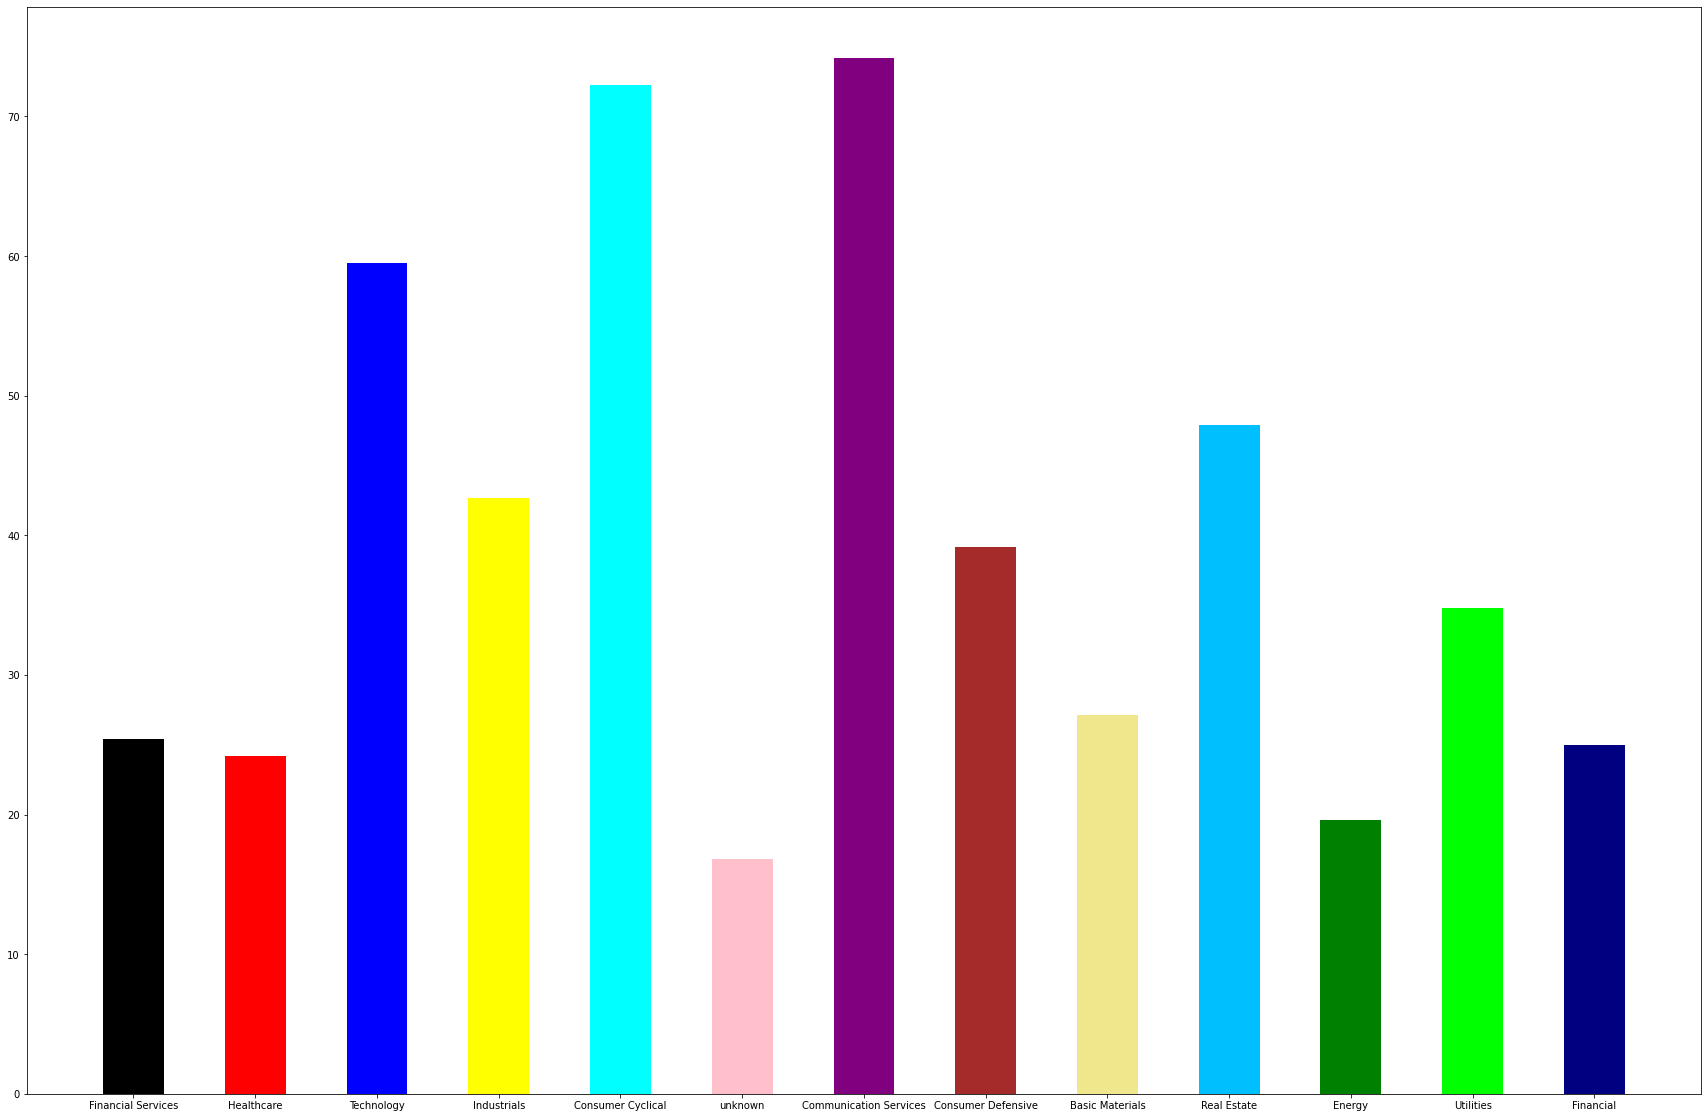

In [13]:
#Conclusion: Plot Bars for visualizing the average of stock prices in every sector!
plt.figure(figsize=(30,20))
plt.bar(sectors,avg, color = ['black', 'red', 'blue', 'yellow', 'cyan','pink', 'purple', 'brown','khaki','deepskyblue', 'green', 'lime', 'navy'],width=.5)
plt.show()

In [14]:
Healthcare = df[df['Sector'] == 'Healthcare']['Perf_Week(%)'].mean()
Financial_Services = df[df['Sector'] == 'Financial Services']['Perf_Week(%)'].mean()
Industrials = df[df['Sector'] == 'Industrials']['Perf_Week(%)'].mean()
Technology = df[df['Sector'] == 'Technology']['Perf_Week(%)'].mean()
Consumer_Cyclical = df[df['Sector'] == 'Consumer Cyclical']['Perf_Week(%)'].mean()
Real_Estate = df[df['Sector'] == 'Real Estate']['Perf_Week(%)'].mean()
Communication_Services = df[df['Sector'] == 'Communication Services']['Perf_Week(%)'].mean()
Energy = df[df['Sector'] == 'Energy']['Perf_Week(%)'].mean()
Consumer_Defensive = df[df['Sector'] == 'Consumer Defensive']['Perf_Week(%)'].mean()
unknown = df[df['Sector'] == 'unknown']['Perf_Week(%)'].mean()
Basic_Materials = df[df['Sector'] == 'Basic Materials']['Perf_Week(%)'].mean()
Utilities = df[df['Sector'] == 'Utilities']['Perf_Week(%)'].mean()
Financial = df[df['Sector'] == 'Financial']['Perf_Week(%)'].mean()

In [15]:
prf_week = []
prf_week.append(Financial_Services)
prf_week.append(Healthcare)
prf_week.append(Technology)
prf_week.append(Industrials)
prf_week.append(Consumer_Cyclical)
prf_week.append(unknown)
prf_week.append(Communication_Services)
prf_week.append(Consumer_Defensive)
prf_week.append(Basic_Materials)
prf_week.append(Real_Estate)
prf_week.append(Energy)
prf_week.append(Utilities)
prf_week.append(Financial)

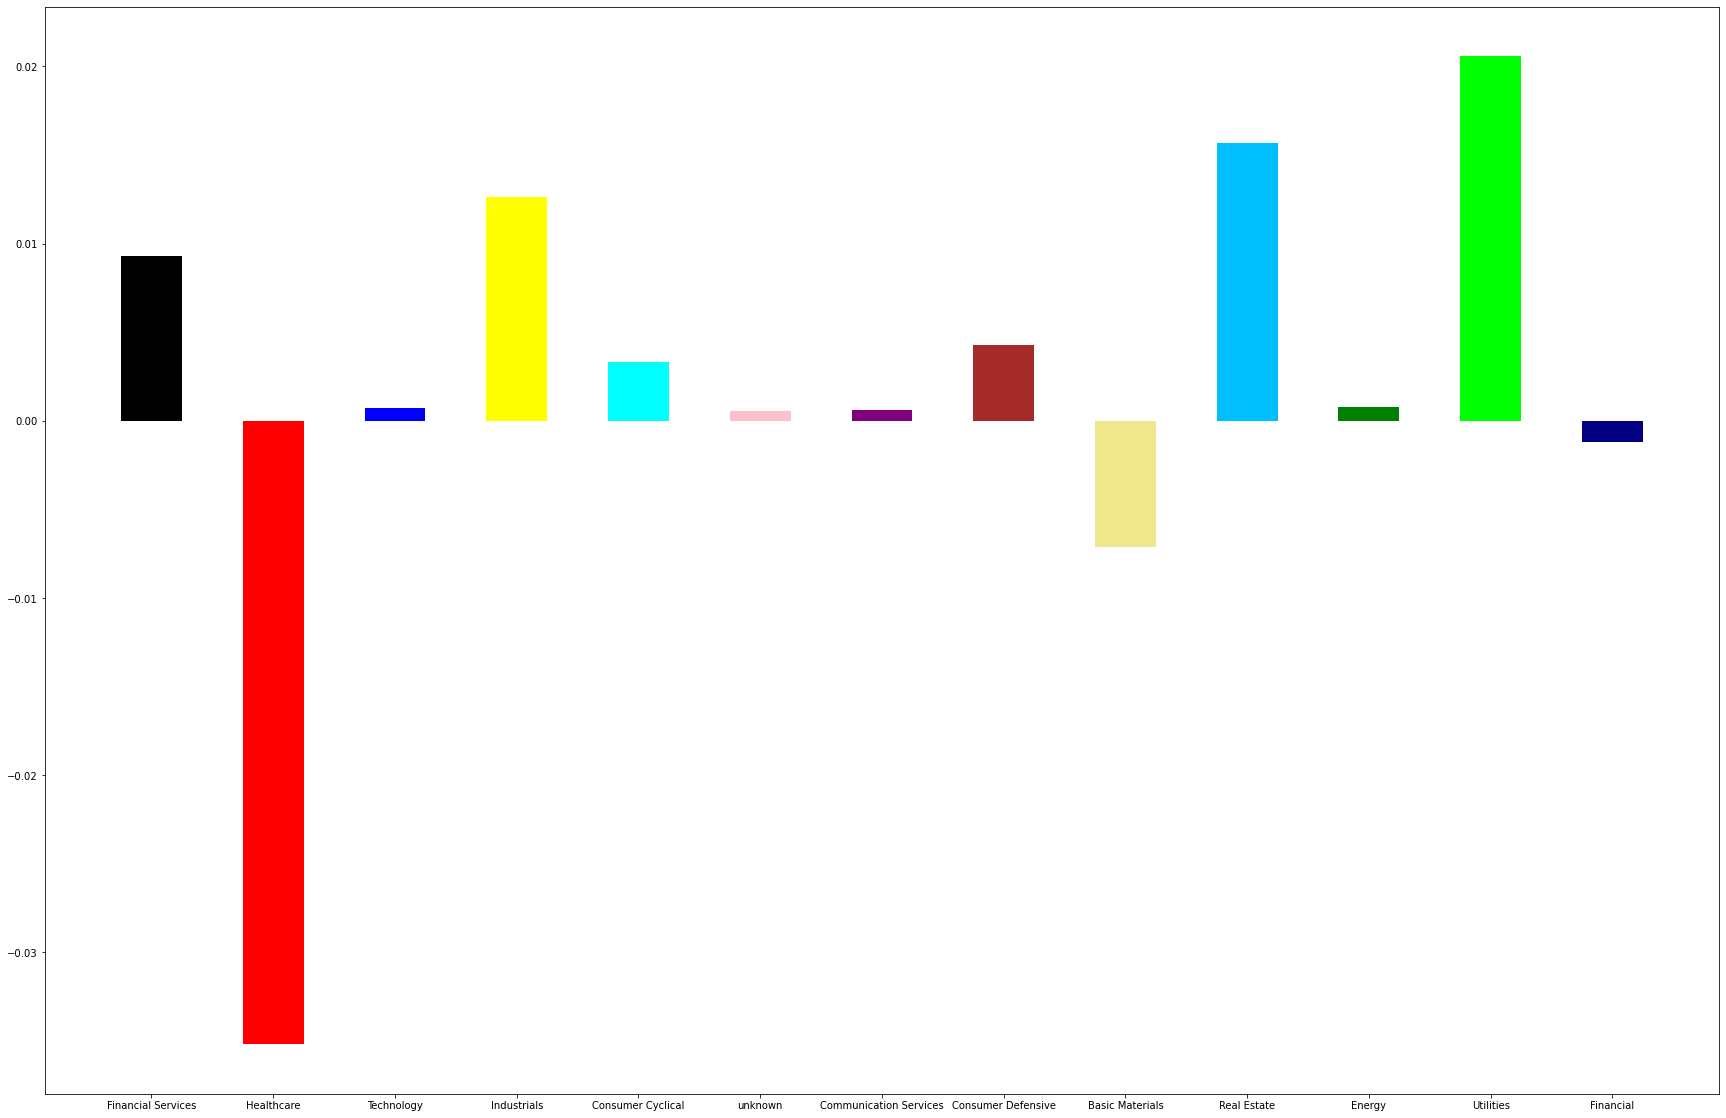

In [16]:
# Plot Bars for visualizing the average of stock prices in every sector!
plt.figure(figsize=(30,20))
plt.bar(sectors,prf_week, color = ['black', 'red', 'blue', 'yellow', 'cyan','pink', 'purple', 'brown','khaki','deepskyblue', 'green', 'lime', 'navy'],width=.5)
plt.show()

<AxesSubplot:xlabel='Sector', ylabel='Perf_Year(%)'>

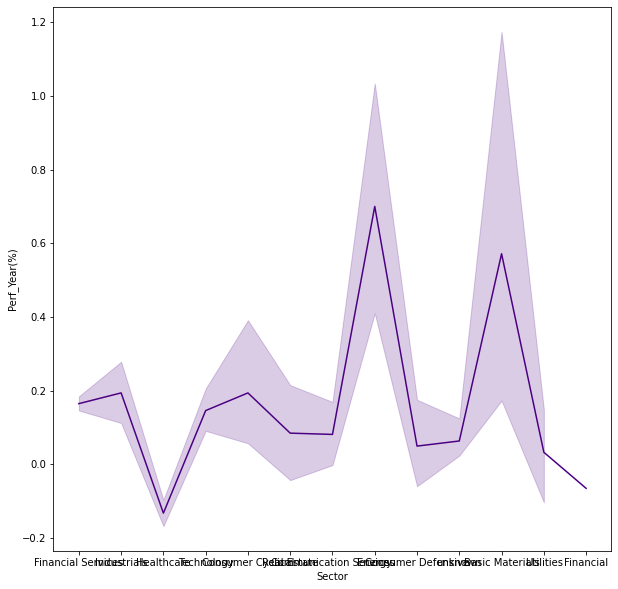

In [17]:
plt.figure(figsize = (10,10))
sns.lineplot(data=df, x="Sector", y="Perf_Year(%)", color = 'indigo')

<AxesSubplot:xlabel='Sector', ylabel='Vol_Avg_3_Months'>

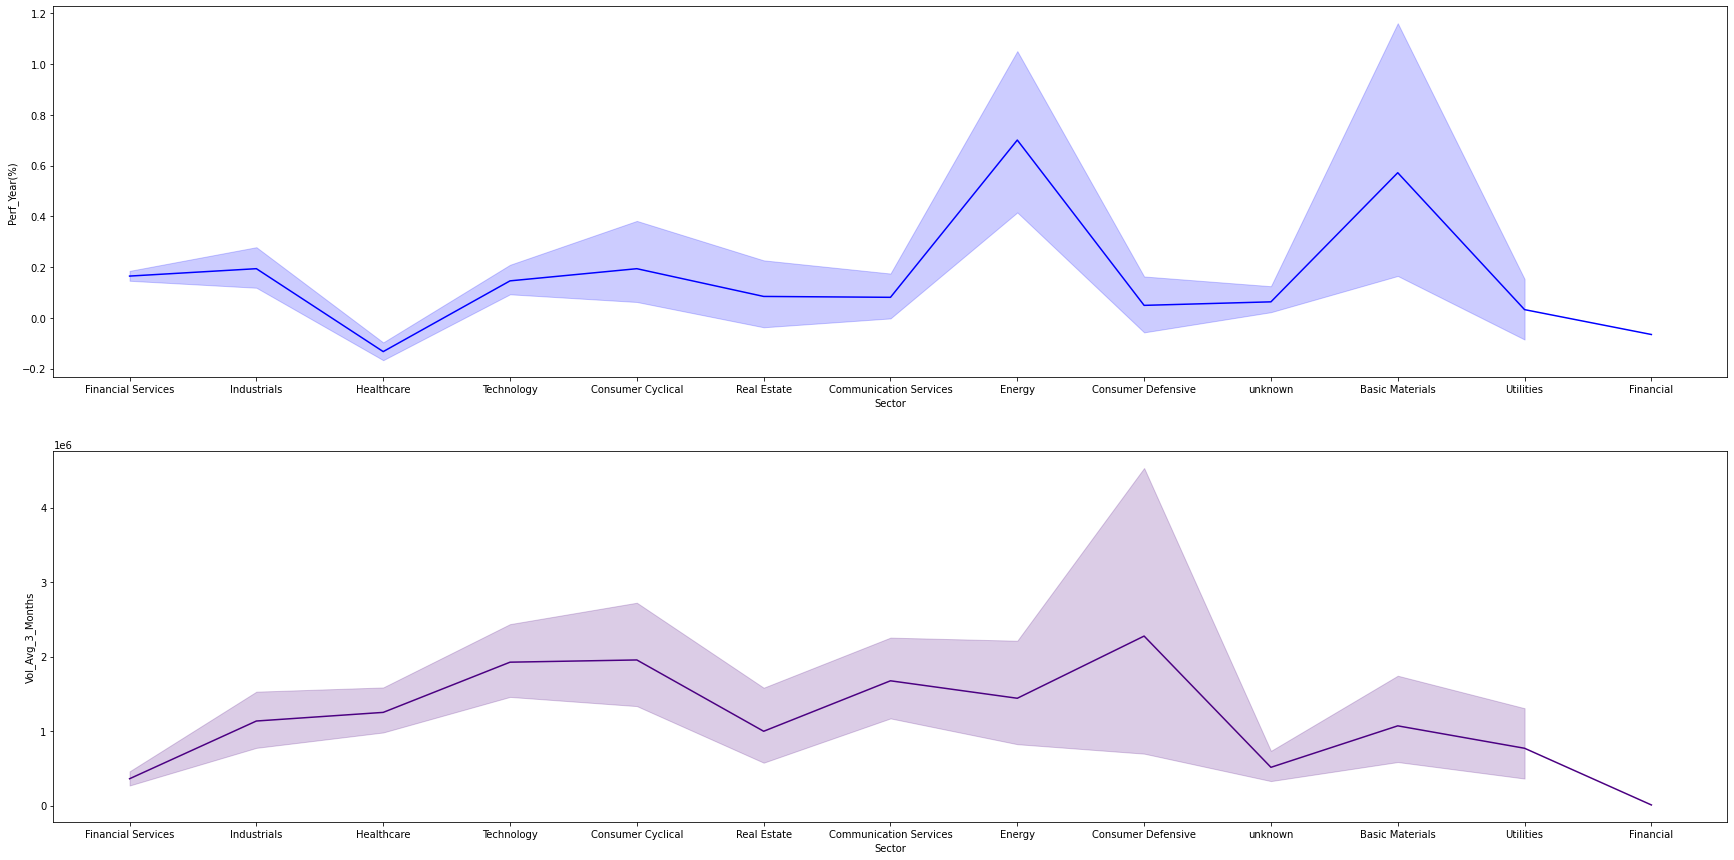

In [18]:
fig, axes = plt.subplots(2,1, figsize=(30,15))
sns.lineplot(ax = axes[0], data=df, x="Sector", y="Perf_Year(%)", color ='blue')
sns.lineplot(ax = axes[1],data=df, x="Sector", y="Vol_Avg_3_Months", color='indigo')

In [19]:
#All the sectors in our dataframe
df['Sector'].unique()

array(['Financial Services', 'Industrials', 'Healthcare', 'Technology',
       'Consumer Cyclical', 'Real Estate', 'Communication Services',
       'Energy', 'Consumer Defensive', 'unknown', 'Basic Materials',
       'Utilities', 'Financial'], dtype=object)

In [20]:
#Creating the arrays of all our sectors
Financial_Services=[]
Industrials=[]
Healthcare=[]
Technology=[]
Consumer_Cyclical=[] 
Real_Estate=[]
Communication_Services=[]
Energy=[] 
Consumer_Defensive=[] 
unknown=[] 
Basic_Materials=[]
Utilities=[]
Financial=[]

In [21]:
#Creating array x which contains all the perfs of all time in our dataframe
x=['Perf_Year(%)','Perf_Half_Year(%)','Perf_Quarter(%)','Perf_Month(%)','Perf_Week(%)']

In [22]:
#Appending all the mean of all perfs of each sector!
Technology.append(df[df['Sector']=='Technology']['Perf_Year(%)'].mean())
Technology.append(df[df['Sector']=='Technology']['Perf_Half_Year(%)'].mean())
Technology.append(df[df['Sector']=='Technology']['Perf_Quarter(%)'].mean())
Technology.append(df[df['Sector']=='Technology']['Perf_Month(%)'].mean())
Technology.append(df[df['Sector']=='Technology']['Perf_Week(%)'].mean())

Financial_Services.append(df[df['Sector']=='Financial Services']['Perf_Year(%)'].mean())
Financial_Services.append(df[df['Sector']=='Financial Services']['Perf_Half_Year(%)'].mean())
Financial_Services.append(df[df['Sector']=='Financial Services']['Perf_Quarter(%)'].mean())
Financial_Services.append(df[df['Sector']=='Financial Services']['Perf_Month(%)'].mean())
Financial_Services.append(df[df['Sector']=='Financial Services']['Perf_Week(%)'].mean())

Industrials.append(df[df['Sector']=='Industrials']['Perf_Year(%)'].mean())
Industrials.append(df[df['Sector']=='Industrials']['Perf_Half_Year(%)'].mean())
Industrials.append(df[df['Sector']=='Industrials']['Perf_Quarter(%)'].mean())
Industrials.append(df[df['Sector']=='Industrials']['Perf_Month(%)'].mean())
Industrials.append(df[df['Sector']=='Industrials']['Perf_Week(%)'].mean())

Healthcare.append(df[df['Sector']=='Healthcare']['Perf_Year(%)'].mean())
Healthcare.append(df[df['Sector']=='Healthcare']['Perf_Half_Year(%)'].mean())
Healthcare.append(df[df['Sector']=='Healthcare']['Perf_Quarter(%)'].mean())
Healthcare.append(df[df['Sector']=='Healthcare']['Perf_Month(%)'].mean())
Healthcare.append(df[df['Sector']=='Healthcare']['Perf_Week(%)'].mean())

Consumer_Cyclical.append(df[df['Sector']=='Consumer Cyclical']['Perf_Year(%)'].mean())
Consumer_Cyclical.append(df[df['Sector']=='Consumer Cyclical']['Perf_Half_Year(%)'].mean())
Consumer_Cyclical.append(df[df['Sector']=='Consumer Cyclical']['Perf_Quarter(%)'].mean())
Consumer_Cyclical.append(df[df['Sector']=='Consumer Cyclical']['Perf_Month(%)'].mean())
Consumer_Cyclical.append(df[df['Sector']=='Consumer Cyclical']['Perf_Week(%)'].mean())

Real_Estate.append(df[df['Sector']=='Real Estate']['Perf_Year(%)'].mean())
Real_Estate.append(df[df['Sector']=='Real Estate']['Perf_Half_Year(%)'].mean())
Real_Estate.append(df[df['Sector']=='Real Estate']['Perf_Quarter(%)'].mean())
Real_Estate.append(df[df['Sector']=='Real Estate']['Perf_Month(%)'].mean())
Real_Estate.append(df[df['Sector']=='Real Estate']['Perf_Week(%)'].mean())

Communication_Services.append(df[df['Sector']=='Communication Services']['Perf_Year(%)'].mean())
Communication_Services.append(df[df['Sector']=='Communication Services']['Perf_Half_Year(%)'].mean())
Communication_Services.append(df[df['Sector']=='Communication Services']['Perf_Quarter(%)'].mean())
Communication_Services.append(df[df['Sector']=='Communication Services']['Perf_Month(%)'].mean())
Communication_Services.append(df[df['Sector']=='Communication Services']['Perf_Week(%)'].mean())

Energy.append(df[df['Sector']=='Energy']['Perf_Year(%)'].mean())
Energy.append(df[df['Sector']=='Energy']['Perf_Half_Year(%)'].mean())
Energy.append(df[df['Sector']=='Energy']['Perf_Quarter(%)'].mean())
Energy.append(df[df['Sector']=='Energy']['Perf_Month(%)'].mean())
Energy.append(df[df['Sector']=='Energy']['Perf_Week(%)'].mean())

Consumer_Defensive.append(df[df['Sector']=='Consumer Defensive']['Perf_Year(%)'].mean())
Consumer_Defensive.append(df[df['Sector']=='Consumer Defensive']['Perf_Half_Year(%)'].mean())
Consumer_Defensive.append(df[df['Sector']=='Consumer Defensive']['Perf_Quarter(%)'].mean())
Consumer_Defensive.append(df[df['Sector']=='Consumer Defensive']['Perf_Month(%)'].mean())
Consumer_Defensive.append(df[df['Sector']=='Consumer Defensive']['Perf_Week(%)'].mean())

Basic_Materials.append(df[df['Sector']=='Basic Materials']['Perf_Year(%)'].mean())
Basic_Materials.append(df[df['Sector']=='Basic Materials']['Perf_Half_Year(%)'].mean())
Basic_Materials.append(df[df['Sector']=='Basic Materials']['Perf_Quarter(%)'].mean())
Basic_Materials.append(df[df['Sector']=='Basic Materials']['Perf_Month(%)'].mean())
Basic_Materials.append(df[df['Sector']=='Basic Materials']['Perf_Week(%)'].mean())

Utilities.append(df[df['Sector']=='Utilities']['Perf_Year(%)'].mean())
Utilities.append(df[df['Sector']=='Utilities']['Perf_Half_Year(%)'].mean())
Utilities.append(df[df['Sector']=='Utilities']['Perf_Quarter(%)'].mean())
Utilities.append(df[df['Sector']=='Utilities']['Perf_Month(%)'].mean())
Utilities.append(df[df['Sector']=='Utilities']['Perf_Week(%)'].mean())

Financial.append(df[df['Sector']=='Financial']['Perf_Year(%)'].mean())
Financial.append(df[df['Sector']=='Financial']['Perf_Half_Year(%)'].mean())
Financial.append(df[df['Sector']=='Financial']['Perf_Quarter(%)'].mean())
Financial.append(df[df['Sector']=='Financial']['Perf_Month(%)'].mean())
Financial.append(df[df['Sector']=='Financial']['Perf_Week(%)'].mean())

unknown.append(df[df['Sector']=='unknown']['Perf_Year(%)'].mean())
unknown.append(df[df['Sector']=='unknown']['Perf_Half_Year(%)'].mean())
unknown.append(df[df['Sector']=='unknown']['Perf_Quarter(%)'].mean())
unknown.append(df[df['Sector']=='unknown']['Perf_Month(%)'].mean())
unknown.append(df[df['Sector']=='unknown']['Perf_Week(%)'].mean())

In [23]:
#Due to the corona virus spread all the stocks went down!
plt.figure(figsize=(20,10), dpi= 1000)
plt.plot(x,Technology, label = "Technology")
plt.plot(x,Financial_Services, label = "Financial_Services")
plt.plot(x,Industrials, label = "Industrials")
plt.plot(x,Healthcare, label = "Healthcare")
plt.plot(x,Consumer_Cyclical, label = "Consumer_Cyclical")
plt.plot(x,Real_Estate, label = "Real_Estate")
plt.plot(x,Communication_Services, label = "Communication_Services")
plt.plot(x,Energy, label = "Energy")
plt.plot(x, Consumer_Defensive, label = "Consumer_Defensive")
plt.plot(x,Basic_Materials, label = "Basic_Materials")
plt.plot(x,Utilities, label = "Utilities")
plt.plot(x,Financial, label = "Financial")
plt.plot(x,unknown, label = "unknown")
plt.legend()
plt.show()

In [24]:
df.to_csv('After_Eda.csv', index=False)